# Teste 3

#### Beatriz Evelbauer 

Queremos calcular 

$$ \int_0^{T} W_t dW_t \approx \sum_{j=1}^{n} W_{t_{j-1}} (W_{t_j} - W_{t_{j-1}}) $$

com os seguintes parâmetros:

* $T=1$ - tempo final
* $m=100$ - número de amostras de $W_t$
* $n=100$ - número de pontos na malha



In [5]:
using Plots, Distributions, Random
theme(:ggplot2)

rng = MersenneTwister(1234)

MersenneTwister(1234)

In [6]:
# definindo parametros
T = 1
m = 100
n = 100
Δt = T/n 

# calculando todos os tempos 
ts = [j*T/n for j ∈ 1:n]
nothing

Primeiro vamos gerar as amostras do processo de Wiener.

In [73]:
# gerando o processo de Wiener 
function WienerSim(n=n ,T=T)
    Wt = Vector(undef,n+1)
    Wt[1] = 0
    Δt = T/n
    for i ∈ 1:n 
        step = randn(rng) * √Δt # novo incremento
        Wt[i+1] = Wt[i] + step
    end
    return Wt 
end

WienerSim (generic function with 3 methods)

In [74]:
# m samples
Ws = Vector(undef,m)
for i ∈ 1:m 
    Ws[i] = WienerSim()
end

Agora, vamos definir uma função para calcular a integral de Itô.

In [75]:
function DiscreteIto(Ws, Δt=Δt)
    m = size(Ws)[1]
    n = size(Ws[1])[1] - 1
    Is = Vector(undef,m)
    for i ∈ 1:m 
        current_w = Ws[i]
        aux = current_w[2:n+1] .- current_w[1:n]
        new_i = sum(current_w[1:n] .* aux) 
        Is[i] = new_i
    end
    return Is 
end

DiscreteIto (generic function with 2 methods)

In [76]:
Is = DiscreteIto(Ws)
nothing

Agora, vamos comparar aos histogramas de

$$\frac{W_T^2}{2} - \frac{T}{2} $$

e de 

$$ - \frac{T}{2} + \frac{1}{2} \Gamma \left( \frac{1}{2}, T \right) $$

In [77]:
# gerando as amostras 
aprox = 0.5 .* (randn(m).^2 .- T)
gamma = Gamma(0.5,2*T)
approx_gamma = 0.5 .* (rand(gamma,m) .- T)
nothing

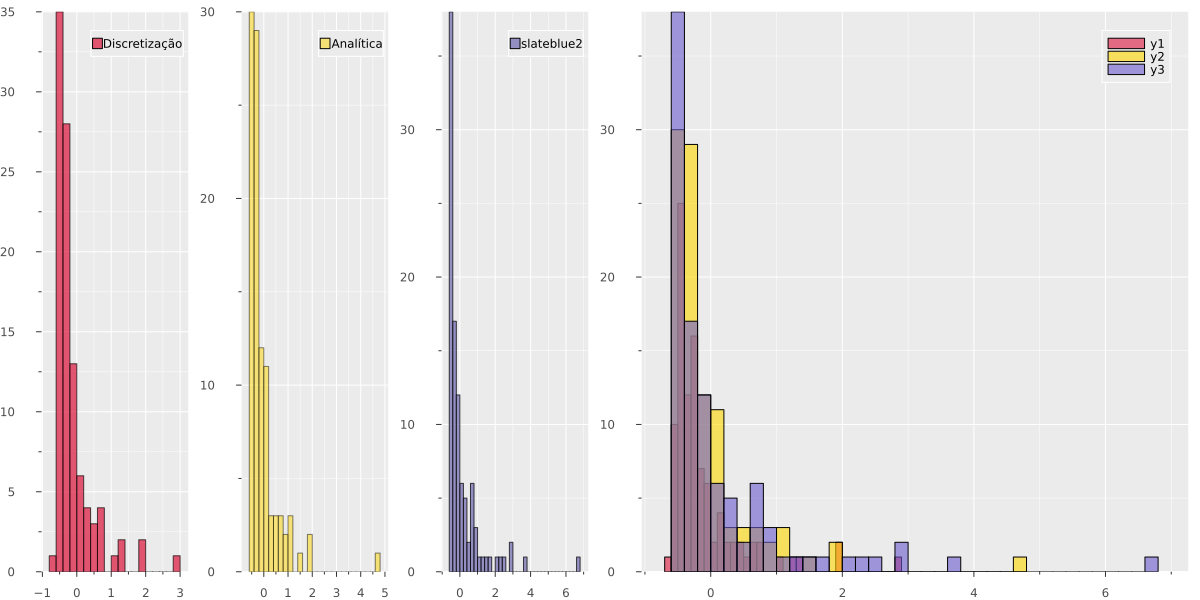

In [101]:
p1 = histogram(Is, bins=20, label="Discretização", color="crimson", alpha=0.7)
p2 = histogram(aprox,bins=30, label="Analítica", color="gold", alpha=0.5)
p3 = histogram(approx_gamma, bins=40, label="slateblue2", color="#7570B3", alpha=0.75)
p4 = histogram([Is,aprox,approx_gamma],bins=40,fillalpha=0.6, palette=["crimson","gold","slateblue"])
aux_p = plot(p1,p2,p3,layout=(1,3), size=(1000,600))
plot(aux_p,p4, size=(1200,600))

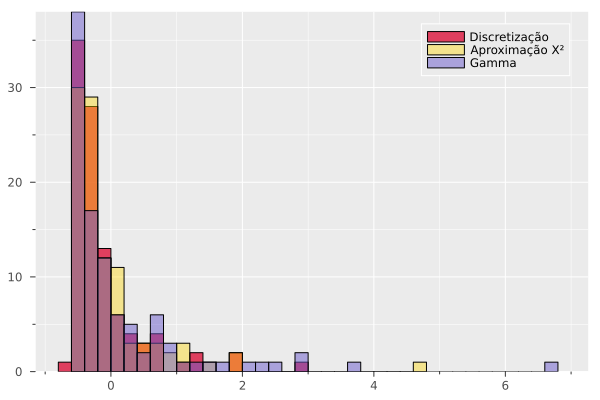

In [93]:
histogram(Is, bins=20, fillalpha=0.8, label="Discretização", size=(600,400), color="crimson")
histogram!(aprox, bins=30, fillalpha=0.4, label="Aproximação Χ²", color="gold")
histogram!(approx_gamma, bins=50, fillalpha=0.5, label="Gamma", color="slateblue")

## Variando os parâmetros 

Em geral, vamos refinar a malha e aumentar um pouco o número de amostras.

In [103]:
# definindo parametros
T = 1
m = 10000
n = 1000
Δt = T/n 

# calculando todos os tempos 
ts = [j*T/n for j ∈ 1:n]
nothing

In [104]:
# m samples
Ws = Vector(undef,m)
for i ∈ 1:m 
    Ws[i] = WienerSim()
end
Is = DiscreteIto(Ws)
nothing

In [105]:
# gerando as amostras 
aprox = 0.5 .* (randn(m).^2 .- T)
gamma = Gamma(0.5,2*T)
approx_gamma = 0.5 .* (rand(gamma,m) .- T)
nothing

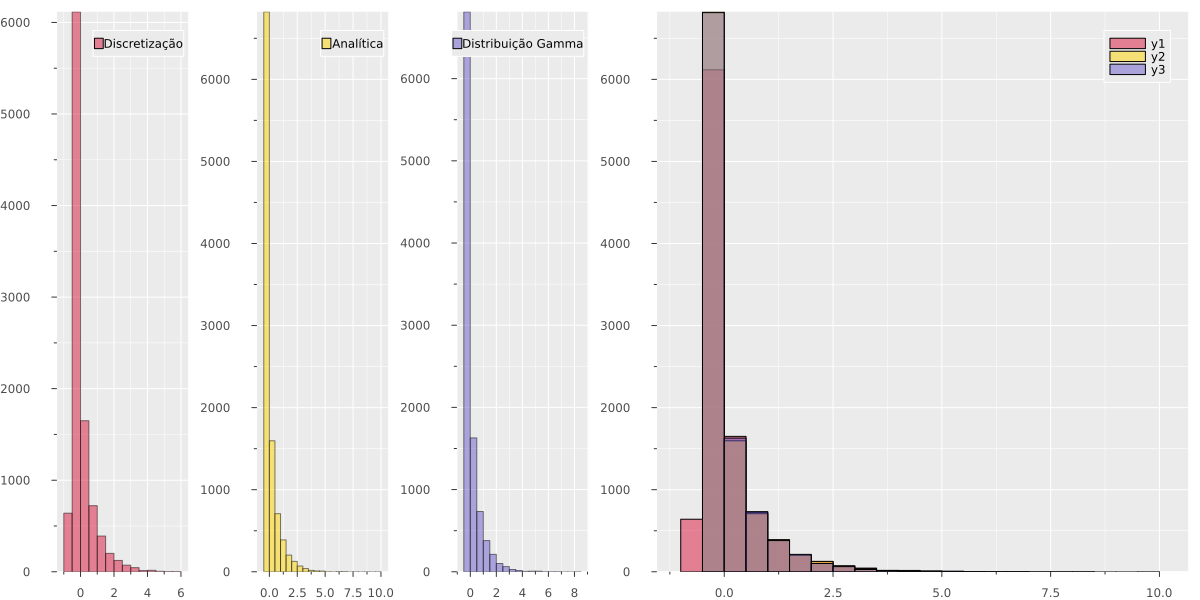

In [106]:
p1 = histogram(Is, bins=20, label="Discretização", color="crimson", alpha=0.5)
p2 = histogram(aprox,bins=20, label="Analítica", color="gold", alpha=0.5)
p3 = histogram(approx_gamma, bins=20, label="Distribuição Gamma", color="slateblue", alpha=0.5)
p4 = histogram([Is,aprox,approx_gamma],bins=20,fillalpha=0.5, palette=["crimson","gold","slateblue"])
aux_p = plot(p1,p2,p3,layout=(1,3), size=(1000,600))
plot(aux_p,p4, size=(1200,600))

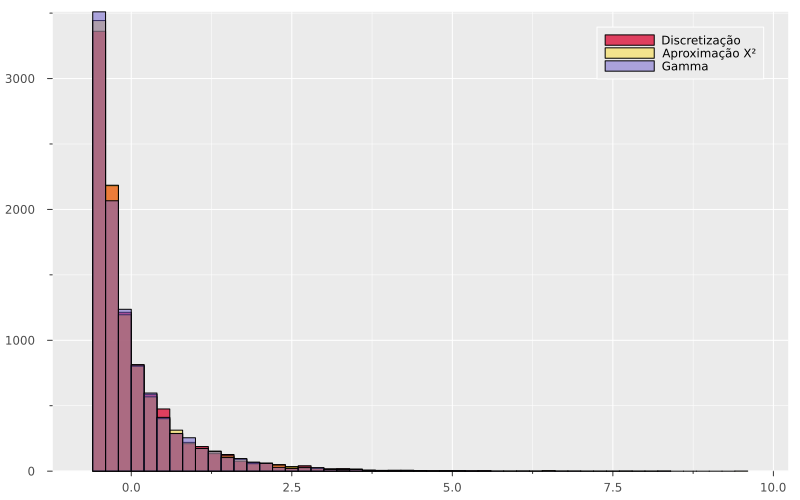

In [109]:
histogram(Is, bins=50, fillalpha=0.8, label="Discretização", size=(800,500), color="crimson")
histogram!(aprox, bins=50, fillalpha=0.4, label="Aproximação Χ²", color="gold")
histogram!(approx_gamma, bins=50, fillalpha=0.5, label="Gamma", color="slateblue")